Librairies

In [7]:
import yfinance as yf
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
#from statsmodels.tsa import stattools as stat_ts 
#from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from math import sqrt, exp, log
from scipy.stats import norm
from numpy import mean, std
from random import gauss
import matplotlib.pyplot as plt
import warnings

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [9]:
tickers = yf.Tickers("TEP.PA")
df_stock = tickers.tickers['TEP.PA'].history(period="2y")
df_stock.reset_index(inplace = True)

# Let's take a look into the dataframe 
df_stock.columns
df_stock.head(10)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2022-11-11 00:00:00+01:00,185.897490,187.663510,151.645872,176.602615,2503657,0.0,0.0
1,2022-11-14 00:00:00+01:00,185.897491,190.080185,176.788511,188.407104,898242,0.0,0.0
2,2022-11-15 00:00:00+01:00,195.285314,209.134671,195.285314,207.275696,849703,0.0,0.0
3,2022-11-16 00:00:00+01:00,206.532109,209.971210,199.932757,203.464798,569607,0.0,0.0
4,2022-11-17 00:00:00+01:00,201.977619,206.717996,200.490433,201.326981,355362,0.0,0.0
5,2022-11-18 00:00:00+01:00,201.326977,213.131464,201.326977,208.669922,462241,0.0,0.0
6,2022-11-21 00:00:00+01:00,205.323775,207.833402,203.185965,206.067368,251504,0.0,0.0
7,2022-11-22 00:00:00+01:00,204.487258,205.323791,196.679568,199.375076,355431,0.0,0.0
8,2022-11-23 00:00:00+01:00,200.304537,200.583386,190.544919,194.541718,390072,0.0,0.0
9,2022-11-24 00:00:00+01:00,197.051332,201.234026,195.006463,197.980820,251769,0.0,0.0


0.265058380336731


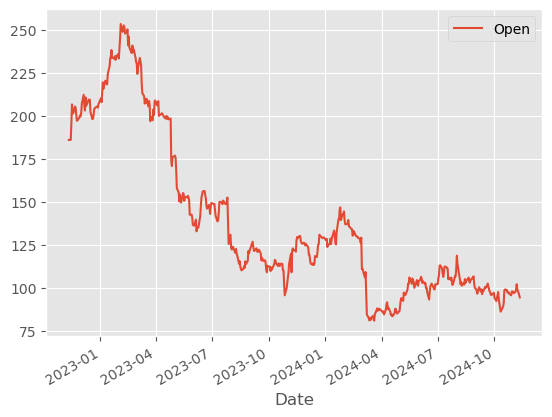

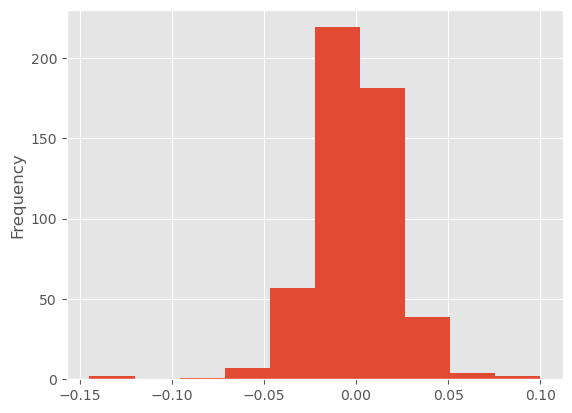

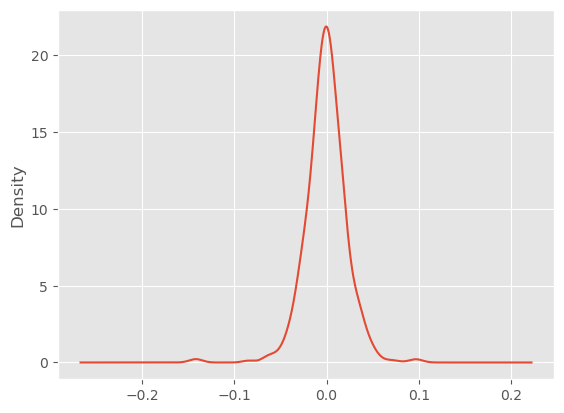

191.99023079087624
                         Date        Open        High         Low       Close  \
0   2022-11-11 00:00:00+01:00  185.897490  187.663510  151.645872  176.602615   
1   2022-11-14 00:00:00+01:00  185.897491  190.080185  176.788511  188.407104   
2   2022-11-15 00:00:00+01:00  195.285314  209.134671  195.285314  207.275696   
3   2022-11-16 00:00:00+01:00  206.532109  209.971210  199.932757  203.464798   
4   2022-11-17 00:00:00+01:00  201.977619  206.717996  200.490433  201.326981   
..                        ...         ...         ...         ...         ...   
507 2024-11-05 00:00:00+01:00   99.040001  102.300003   98.739998  100.699997   
508 2024-11-06 00:00:00+01:00  102.000000  104.699997   97.599998   98.820000   
509 2024-11-07 00:00:00+01:00   98.620003   99.300003   91.900002   98.300003   
510 2024-11-08 00:00:00+01:00   98.260002   98.959999   94.680000   94.680000   
511 2024-11-11 00:00:00+01:00   94.400002   94.839996   92.599998   94.540001   

      Vo

In [17]:
df_stock["Date"] = pd.to_datetime(df_stock["Date"],format="%d/%m/%Y")

def Calc_Returns(Val_start, Val_end):
    return((Val_end - Val_start) / Val_start)

# Compute the daily returns and log-returns
df_stock["Returns"] =  Calc_Returns(df_stock["Open"], df_stock["Close"])
df_stock["Log_Returns"] =  np.log(df_stock["Close"]/df_stock["Open"])

# Having fun
sum(df_stock.Returns**2)
sum(df_stock.Log_Returns**2)

somme = 0
for ind in range (len(df_stock["Returns"])) :
    somme += df_stock.loc[ind,"Returns"]**2
print(somme)

# Checking for dividends 
sum(df_stock.Dividends)
df_stock.Dividends[df_stock.Dividends > 0]

# Let's create the key charts 
df_stock.plot(x='Date', y='Open')
plt.show()

df_stock.Returns.plot(kind = 'hist' )
plt.show()

df_stock.Returns.plot(kind = 'density' )
plt.show()

# Wanna do a quick normality check ?
Skew = sum((df_stock.Returns - np.mean(df_stock.Returns))**3)/len(df_stock.Returns) / sum((df_stock.Returns - np.mean(df_stock.Returns))**2)**(3/2)
Kurt = sum((df_stock.Returns - np.mean(df_stock.Returns))**4)/len(df_stock.Returns) / sum((df_stock.Returns - np.mean(df_stock.Returns))**2)**(2)

JarqueBera = (len(df_stock.Returns)/6) * (Skew + (Kurt-3)**2/4)

print(JarqueBera)
# We reject the null hypothesis, the skewness and kurtosis are different than 0 and 3. The retunrs don't follow a normal distribution (no shit)

print(df_stock)

In [ ]:
Trading like view of the asset price

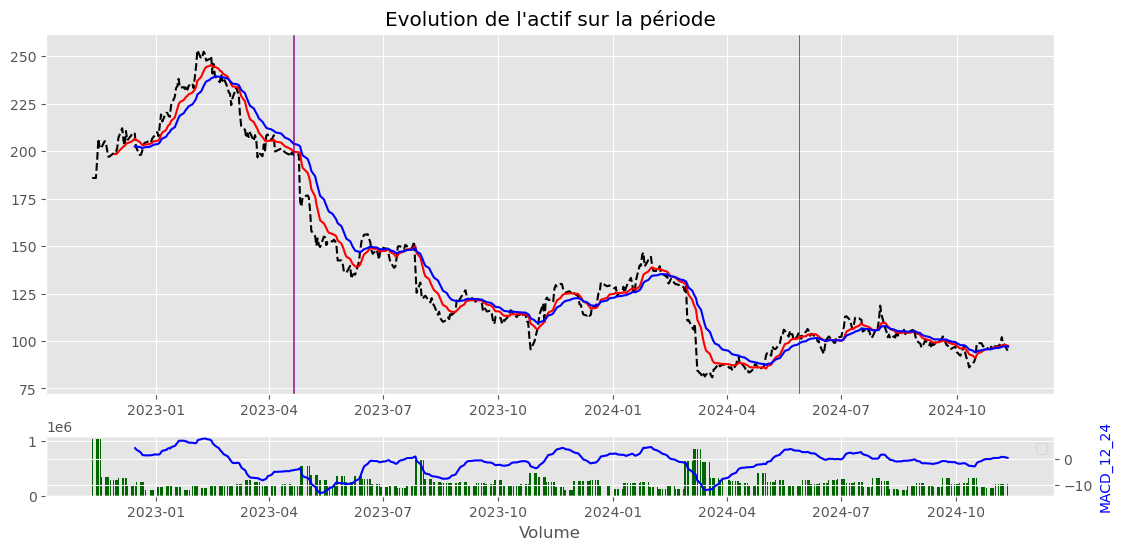

In [43]:
def fct_EMA(data,index,period) :
    multi = 2/(period+1)
    EMA = (data.loc[index-1,"Close"]-data.loc[index-1,"EMA_"+str(period)])*multi+data.loc[index-1,"EMA_"+str(period)]
    return(EMA)

def Col_EMA (data,period):
    col_name = "EMA_" + str(period)
    data[col_name] = None
    data.loc[period,col_name] = mean(data.loc[0:period,"Open"])
    for i in range(period+1,len(data)) :
        data.loc[i,col_name] = fct_EMA(data,i,period)
    return(data)

Col_EMA(df_stock,24)
Col_EMA(df_stock,12)
df_stock["MACD_12_24"] = df_stock["EMA_12"] - df_stock["EMA_24"]


df_stock["Volume_hebdo"] = 0
for i in range(0,len(df_stock.Volume)-1, 5):
    df_stock.loc[i:i+4,"Volume_hebdo"] = mean(df_stock.loc[i:i+4, "Volume"])


### Plot 
plt.style.use('ggplot')

fig, (ax1,ax2) = plt.subplots(2, 1, figsize=(13, 6), gridspec_kw={'height_ratios': [6, 1]})

ax1.set_title("Evolution de l'actif sur la période", color="black")
ax1.plot(df_stock.Date, df_stock.Open, label="Open market price", linestyle="--",color="black")
ax1.plot(df_stock.Date, df_stock.EMA_12, label="EMA_12", color="red")
ax1.plot(df_stock.Date, df_stock.EMA_24, label="EMA_24", color="blue")
ax1.legend()

for dates in df_stock.Date[df_stock.Dividends > 0] :
    ax1.axvline(x = pd.to_datetime(dates), label="Dividends", color="purple" , linewidth = 0.5) 

ax2.bar(df_stock.Date, df_stock.Volume_hebdo, label="Volume", color="darkgreen" )
ax2.set_xlabel("Volume")
ax3 = ax2.twinx()
ax3.plot(df_stock.Date, df_stock.MACD_12_24, label="MACD_12_24", color="blue")
ax3.set_ylabel("MACD_12_24", color="blue", fontsize =10)

plt.show()

In [27]:
Initial_capital = 100 # For the following strategies we consider your initial investment capital as the only asset in your possesion
RISK_FREE_RATE = 3.86/100 # annual Euribor Rate

#We make the following hypothesis :
# 1) one can divide any asset in any number of shares
# 2) you can sell the risk free asset, it has a constant rate of the RISK_FREE_RATE value (annual value)

def buy_sell(pf, quantity, price) :
    Montant_transac = quantity * price
    if (pf["Capital"] >= abs(Montant_transac)) :
        pf["RiskyAsset"] += quantity
        pf["Capital"] -= Montant_transac
    else : 
        Loan = pf["Capital"] - Montant_transac
        pf["Capital"] = float(np.where(Loan > 0,max(Loan, 0), 0))
        #pf["Capital"] = if(Loan > 0){max(pf["RiskFree"] + Loan, 0)} else { 0}
        pf["RiskFree"] += min(Loan, 0)
        pf["RiskyAsset"] += quantity
    pf = repay(pf) # After making a market operation, we repay the eventual Loan with our capital  
    return (pf)

def Discret_capitalization_valuation (fund, annual_rate, n_period) :
    daily_rate = annual_rate/250
    fund *= (1+daily_rate)**n_period
    return(fund)

def repay(pf) :
    if (pf["Capital"] > 0) and (pf["RiskFree"] < 0) : 
        Cap_to_riskfree_diff = pf["Capital"]+pf["RiskFree"]
        pf["Capital"] = max(Cap_to_riskfree_diff, 0)
        pf["RiskFree"] = min(Cap_to_riskfree_diff, 0)
    return(pf)

def fct_print_strat_perf (pf, Final_Price, dt) : 
    print("Number of stock in the portfolio : " , pf["RiskyAsset"])
    global Initial_capital
    pf_final_value = pf["Capital"] + (pf["RiskyAsset"] * Final_Price + pf["RiskFree"])
    print("Value of the portfolio at the end of the exercise : " , pf_final_value)
    returns = Calc_Returns(Initial_capital, pf_final_value)
    print("Return over the period : " , returns*100, "%")
    global RISK_FREE_RATE
    risk_free_perf = Discret_capitalization_valuation(Initial_capital, RISK_FREE_RATE, (len(df_stock.Open)-1 // dt))
    print("Risk free portfolio performance : ", risk_free_perf)
    print("Alpha generated : ", (returns - Calc_Returns(Initial_capital, risk_free_perf)), "%")

In [29]:
def Strat_buy_neg_MACD (pf) : 
    dt = 10
    for j  in range (0, len(df_stock.Open)-1, dt) :
        if df_stock.MACD_12_24.loc[[j]].notna().bool() :  # In this example one's as to wait to be able to compute the MACD value in order to strat investing
            Q = df_stock.loc[j, "MACD_12_24"]/100  # Since the MACD takes value between [-100; 100]
            buy_sell(pf, Q, df_stock.loc[j, "Close"])
            pf["RiskFree"] = Discret_capitalization_valuation(pf["RiskFree"], RISK_FREE_RATE, 1)
    Final_Price = df_stock.loc[len(df_stock) - 1, "Close"]
    fct_print_strat_perf(pf, Final_Price, dt)

pf = {"Capital" : Initial_capital , "RiskyAsset" : 0 , "RiskFree" : 0}
Strat_buy_neg_MACD(pf)

Number of stock in the portfolio :  -0.5790147133860721
Value of the portfolio at the end of the exercise :  102.48850473814309
Return over the period :  2.4885047381430923 %
Risk free portfolio performance :  108.22548597593016
Alpha generated :  -0.05736981237787063 %


In [31]:
def Strat_BuyLow_SellHigh (pf) : 
    dt = 1
    for j  in range (1, len(df_stock.Open)-1, dt) :
        Q = Calc_Returns(df_stock.Open.loc[j-1], df_stock.Close.loc[j-1]) # We start this strategy with a simple rule by taking a quantity of 10% of the previous day returns
        if df_stock.Close.loc[j-1] > df_stock.Open.loc[j-1]:
            buy_sell(pf, Q, df_stock.loc[j, "Open"])
        elif df_stock.Close.loc[j-1] < df_stock.Open.loc[j-1]:
            buy_sell(pf, -Q, df_stock.loc[j, "Open"])
        #else : print("RAS")  
        #print(pf)
        pf["RiskFree"] = Discret_capitalization_valuation(pf["RiskFree"], RISK_FREE_RATE, 1)
    Final_Price = df_stock.loc[len(df_stock) - 1, "Close"]
    fct_print_strat_perf(pf, Final_Price, dt)
    
pf = {"Capital" : Initial_capital , "RiskyAsset" : 0 , "RiskFree" : 0}
Strat_BuyLow_SellHigh(pf)

Number of stock in the portfolio :  8.159316795737404
Value of the portfolio at the end of the exercise :  -249.00186551383683
Return over the period :  -349.00186551383683 %
Risk free portfolio performance :  108.20877854052351
Alpha generated :  -3.5721064405436036 %
